In [1]:
import mlgrad
import mlgrad.avragg as avragg
import mlgrad.func as func
import mlgrad.loss as loss
import mlgrad.model as model
import mlgrad.risk as risk
import mlgrad.weights as weights
import mlgrad.irgd as irgd


In [2]:
import matplotlib.pyplot as plt
#plt.style.available
plt.style.use("seaborn-notebook")

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/starsCYG.csv", index_col='id')

In [5]:
#df

In [6]:
log_Te = df["log.Te"].values
log_light = df["log.light"].values

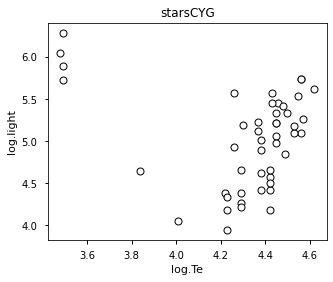

In [7]:
plt.figure("stars_data", (5,4))
plt.title("starsCYG")
plt.scatter(log_Te, log_light, c='w', edgecolors='k', linewidth=1.0)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.show()

[-7.98825477  2.9308476 ]


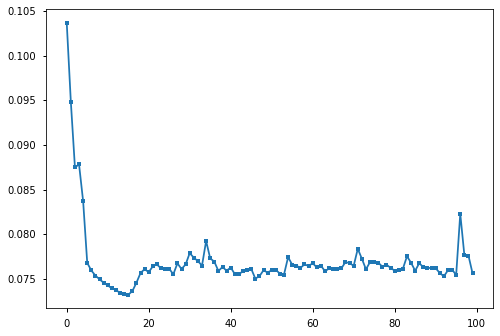

In [15]:
linear_model1 = model.LinearModel([1.,1.])
sq_loss = loss.ErrorLoss(func.Square())
er1 = mlgrad.erisk(log_Te.reshape(-1,1), log_light, linear_model1, sq_loss)
fg1 = mlgrad.fg(er1, h=0.01, tol=1.0e-8)

smoothed_quantile = mlgrad.averager_it(func.Quantile_Sqrt(0.85, 0.001))

#wm_func = func.SoftMinFunc(3)
wm_func = func.WinsorizedSmoothFunc(func.Sqrt(0.001))
avg_func = avragg.ParameterizedAverage(wm_func, smoothed_quantile)

#avg_func = avragg.WMAverage(smoothed_quantile)
#avg_func = smoothed_quantile

wg1 = weights.MWeights(avg_func, er1)
alg = mlgrad.erm_irgd(fg1, wg1, tol=1.0e-5)

print(linear_model1.param.base)
plt.plot(alg.lvals, marker='s', markersize=4)
plt.show()

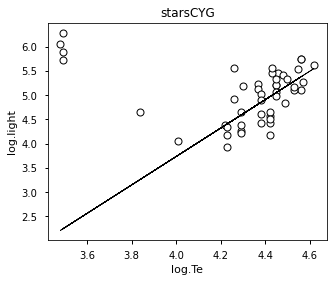

In [9]:
plt.figure("stars_data", (5,4))
plt.title("starsCYG")
plt.scatter(log_Te, log_light, c='w', edgecolors='k', linewidth=1.0)
plt.plot(log_Te, linear_model1.evaluate_all(log_Te.reshape(-1,1)), color='k', linewidth=0.75)
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.show()

In [10]:
7/len(log_Te)

0.14893617021276595